<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
#Start Here

from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

import spacy

import pandas as pd

In [2]:
%pwd

'C:\\Users\\jonma\\Programming\\Unit-4\\DS-Unit-4-Sprint-1-NLP\\module4-topic-modeling'

In [3]:
%ls ../module1-text-data/data

Invalid switch - "module1-text-data".


In [4]:
df = pd.read_csv('../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [5]:
df.shape

(28332, 24)

In [6]:
# Subset to just one product or Category here

list(df)

['id',
 'dateAdded',
 'dateUpdated',
 'name',
 'asins',
 'brand',
 'categories',
 'primaryCategories',
 'imageURLs',
 'keys',
 'manufacturer',
 'manufacturerNumber',
 'reviews.date',
 'reviews.dateSeen',
 'reviews.didPurchase',
 'reviews.doRecommend',
 'reviews.id',
 'reviews.numHelpful',
 'reviews.rating',
 'reviews.sourceURLs',
 'reviews.text',
 'reviews.title',
 'reviews.username',
 'sourceURLs']

In [8]:
df['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Electronics,Furniture              2
Home & Garden                      2
Name: primaryCategories, dtype: int64

In [9]:
df = df[df['primaryCategories'] == 'Electronics'].copy()

## Get Tokens

In [10]:
nlp = spacy.load("en_core_web_lg")

In [11]:
tokens = []

for doc in nlp.pipe(df['reviews.text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.lemma_.lower())
            
    tokens.append(doc_tokens)
        
df['tokens'] = tokens

del tokens

In [12]:
df['tokens'].head()

8343    [great, case, place, husband, love, hold, lot,...
8344    [discard, get, rid, broken, cd, case, broken, ...
8345                            [dollar, boycott, amazon]
8346    [initial, impression, good, material, nice, sh...
8347    [pro, standard, echo, con, old, generation, ec...
Name: tokens, dtype: object

# Create id2word


In [13]:
id2word = Dictionary(df['tokens'])
print(len(id2word))

6301


In [14]:
id2word.filter_extremes(no_below=5, no_above=.98)
print(len(id2word))

2162


## Create Corpus Object

In [15]:
corpus = [id2word.doc2bow(d) for d in df['tokens']]

In [16]:
model = LdaMulticore(corpus=corpus, num_topics=10, id2word=id2word, workers=12, passes=5)

In [7]:
import re
words = [re.findall(r'"([^"]*)"',t[1]) for t in model.print_topics()]

NameError: name 'model' is not defined

In [21]:
topics = [' '.join(t[0:5]) for t in words]

In [22]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
love old year tablet game

------ Topic 1 ------
tablet good price great buy

------ Topic 2 ------
great tablet love use need

------ Topic 3 ------
tablet kindle great buy amazon

------ Topic 4 ------
great good screen kindle like

------ Topic 5 ------
buy love use tablet kindle

------ Topic 6 ------
use tablet easy great good

------ Topic 7 ------
amazon great buy tablet product

------ Topic 8 ------
love use easy gift buy

------ Topic 9 ------
tablet fire amazon book kindle



In [38]:
# Steps to Score Training Documents
# Already have BOW Represented called 'corpus'

distro = [lda[d] for d in corpus]
num_topics = 20

def update(doc):
        d_dist = {k:0 for k in range(0,num_topics)}
        for topic in doc:
            # Topic is Tuple where the first part is the topic id
            # the second part is the topic distribution in that doc
            d_dist[topic[0]] = topic[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [23]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.051656  0.084490       1        1  13.869965
9      0.050711  0.002546       2        1  13.291076
7      0.092121 -0.006548       3        1  12.510808
4      0.013944  0.004309       4        1  10.566442
2     -0.005694 -0.022561       5        1   9.399794
1      0.027509  0.009611       6        1   8.885739
3      0.043131  0.017019       7        1   8.741418
8     -0.115597 -0.011991       8        1   8.703468
5     -0.026276  0.051295       9        1   7.921703
6     -0.028191 -0.128170      10        1   6.109600, topic_info=       Term         Freq        Total Category  logprob  loglift
5      love  4706.000000  4706.000000  Default  30.0000  30.0000
203     use  3434.000000  3434.000000  Default  29.0000  29.0000
68     easy  2639.000000  2639.000000  Default  28.0000  28.0000
515  tablet  6353.000000  6353.000000  Default  27.0000  27.0000
1     great  4805.000000  4805.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
20     like    83.430908  1692.632568  Topic10  -4.9146  -0.2147
186     buy    85.415192  3346.214355  Topic10  -4.8911  -0.8728
5      love    82.811371  4706.701172  Topic10  -4.9220  -1.2449
349    book    72.496269  1521.926025  Topic10  -5.0551  -0.2489
16      get    68.930977  1292.740601  Topic10  -5.1055  -0.1361

[784 rows x 6 columns], token_table=      Topic      Freq Term
term                      
942       1  0.017920    $
942       2  0.212474    $
942       3  0.074238    $
942       4  0.023039    $
942       5  0.092158    $
...     ...       ...  ...
1016      7  0.047203   yr
1016      8  0.026224   yr
1016      9  0.104895   yr
2015      4  0.114444    ©
2015      9  0.801106    ©

[3069 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 8, 5, 3, 2, 4, 9, 6, 7])

In [44]:
list(df)

['id',
 'dateAdded',
 'dateUpdated',
 'name',
 'asins',
 'brand',
 'categories',
 'primaryCategories',
 'imageURLs',
 'keys',
 'manufacturer',
 'manufacturerNumber',
 'reviews.date',
 'reviews.dateSeen',
 'reviews.didPurchase',
 'reviews.doRecommend',
 'reviews.id',
 'reviews.numHelpful',
 'reviews.rating',
 'reviews.sourceURLs',
 'reviews.text',
 'reviews.title',
 'reviews.username',
 'sourceURLs',
 'tokens']

In [44]:
# How are topics correlated with rating? 

topics = pd.DataFrame.from_records(new_distro)
topics.head()

#topics['primaryTopic'] = topics.idxmax(axis=1)

,0,1,2,3,4,5,6,7,8,9
0,0.012504,0.012504,0.012504,0.012504,0.012504,0.012503,0.012503,0.012504,0.887468,0.012503
1,0.000000,0.000000,0.000000,0.276287,0.467709,0.000000,0.000000,0.241996,0.000000,0.000000
2,0.033340,0.456272,0.033348,0.033353,0.033341,0.033342,0.033349,0.276963,0.033338,0.033353
3,0.000000,0.000000,0.000000,0.801390,0.191128,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.607815,0.000000,0.000000,0.000000,0.330614,0.000000,0.000000


In [46]:
df['primaryTopic'] = topics.idxmax(axis=1)

In [48]:
df[['primaryTopic', 'reviews.rating']].groupby('primaryTopic').mean()

,reviews.rating
primaryTopic,
0.0,4.578571
1.0,4.599034
2.0,4.587413
3.0,4.543307
4.0,4.611650
5.0,4.611111
6.0,4.542636
7.0,4.462366
8.0,4.635556


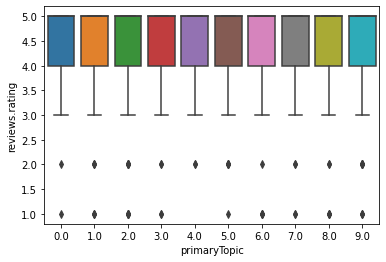

In [49]:
import seaborn as sns

ax = sns.boxplot(x="primaryTopic", y="reviews.rating",
                 data=df)

In [50]:
# Are certin topics more helpful?

df['reviews.numHelpful'].describe()

count    13866.000000
mean         0.552430
std         10.034626
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        621.000000
Name: reviews.numHelpful, dtype: float64

In [52]:
# Continuous Variable

# Bin - using boxplot of upvotes per topic? 

topics_df = pd.DataFrame.from_records(new_distro)

In [53]:
topics_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.012504,0.012504,0.012504,0.012504,0.012504,0.012503,0.012503,0.012504,0.887468,0.012503
1,0.000000,0.000000,0.000000,0.276287,0.467709,0.000000,0.000000,0.241996,0.000000,0.000000
2,0.033340,0.456272,0.033348,0.033353,0.033341,0.033342,0.033349,0.276963,0.033338,0.033353
3,0.000000,0.000000,0.000000,0.801390,0.191128,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.607815,0.000000,0.000000,0.000000,0.330614,0.000000,0.000000


In [54]:
topics_df['primaryTopic'] = topics_df.idxmax(axis=1)

In [55]:
topics_df['primaryTopic'].value_counts()

0    2052
8    1888
2    1852
9    1488
1    1328
4    1156
5    1116
7    1112
6    1041
3     962
Name: primaryTopic, dtype: int64

In [56]:
topics_df['numHelpful'] = df['reviews.numHelpful']

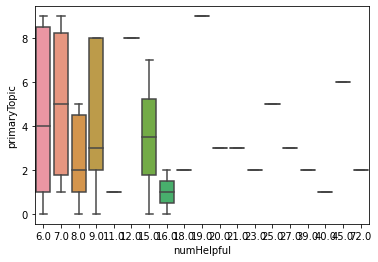

In [57]:
sns.boxplot(x="numHelpful", y="primaryTopic",  data=topics_df[(topics_df['numHelpful'] > 5) & (topics_df['numHelpful'] < 100)]);

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling